In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions 

In [3]:
def z_normalize(x):
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    return x_norm,mu,sigma

In [4]:
def compute_cost_linear_reg(x,y,w,b,lambda_):
    m=x.shape[0]    
    err= (np.dot(x,w.T)+b-y)
    cost=np.sum(err**2)
    reg_cost=np.sum(w**2)   
    total_cost=cost/(2*m)+lambda_*(reg_cost/(2*m))    
    
    return total_cost

In [5]:
def compute_gradient_linear_reg(x,y,w,b,lambda_):
    m=x.shape[0]
    #w(1,n)
    err=(np.dot(x,w.T)+b-y)  
    
    dj_db=np.mean(err)
    dj_dw=  (np.dot(err.T,x)  + lambda_*w)/m
    return dj_db , dj_dw

In [6]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters,lmbda_):
    J_history= []
    w = (w_in)  
    b = b_in 
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b,lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<10000:      
            J_history.append( cost_function(x, y, w, b,lambda_))

       
        if i% np.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:2d}: Cost {J_history[-1]:8.12f}")##print cost at desired no of interval
        
    return w, b, J_history 

# Load Data

In [9]:
df=pd.read_csv('Lineardata_train.csv')
z=np.array(df.head(50000))
y_train=z[:40000:,0].reshape(-1,1)
x_train=z[:40000:,1:]
x_norm,mu,sigma=z_normalize(x_train)
x_cv_norm=(z[40000::,1:]-mu)/sigma
y_cv=(z[40000::,0]).reshape(-1,1)

# Run Gradient descent

In [8]:
initial_w=np.zeros((1,x_norm.shape[1]))
initial_b=0
lambda_=0
alpha=1e-2
iterations=5000
w_final,b_final,j_hist=gradient_descent(x_norm,y_train,initial_w,initial_b,compute_cost_linear_reg,compute_gradient_linear_reg,
                                       alpha,iterations,lambda_)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")


Iteration  0: Cost 64441403.301977016032
Iteration 500: Cost 2744.428621661154
Iteration 1000: Cost 0.126434870093
Iteration 1500: Cost 0.005053983521
Iteration 2000: Cost 0.005048418336
Iteration 2500: Cost 0.005048418072
Iteration 3000: Cost 0.005048418072
Iteration 3500: Cost 0.005048418072
Iteration 4000: Cost 0.005048418072
Iteration 4500: Cost 0.005048418072
b,w found by gradient descent: 77.27,[[2.20066250e+01 3.31369827e+01 9.97515547e+00 6.04433310e+00
  1.75889769e+02 3.29270434e+02 2.53994823e+02 9.01879215e+02
  4.34971516e+02 8.38181865e+01 1.21184698e+02 1.60335867e+03
  1.67468334e+03 1.31824409e+03 5.97217418e+02 1.05670985e+04
  5.04822106e+02 6.78186528e+02 3.16118779e+03 2.29883908e+02]] 


In [11]:
def predict(x,w,b):
    yp=np.dot(x,w.T)+b
    return yp
        
yp=predict(x_norm,w_final,b_final)
yp_cv=predict(x_cv_norm,w_final,b_final)

In [13]:
def R2_score(y,yp):
    a=(y-yp)**2
    a=np.sum(a)
    y_mean=np.mean(y)
    b=(y-y_mean)**2
    b=np.sum(b)
    
    R2_score=1-(a/b)
    return R2_score

print(f'R2_score_train:{R2_score(y_train,yp)}')
print(f'R2_score_cv   :{R2_score(y_cv,yp_cv)}')

R2_score_train:0.9999999999232193
R2_score_cv   :0.9999999999216167


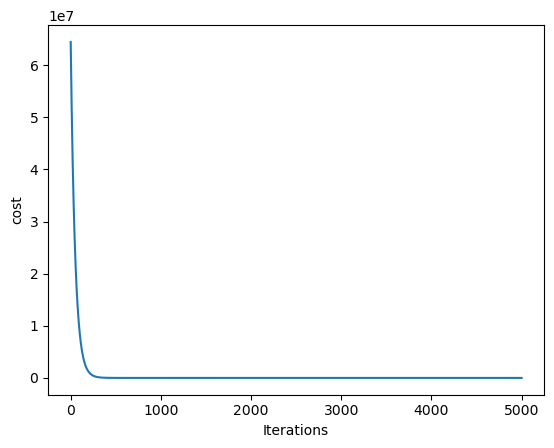

In [26]:
def iters_vs_cost(j_hist,iterations):
    plt.plot(np.arange(iterations),j_hist)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.show()
    pass
iters_vs_cost(j_hist,iterations)

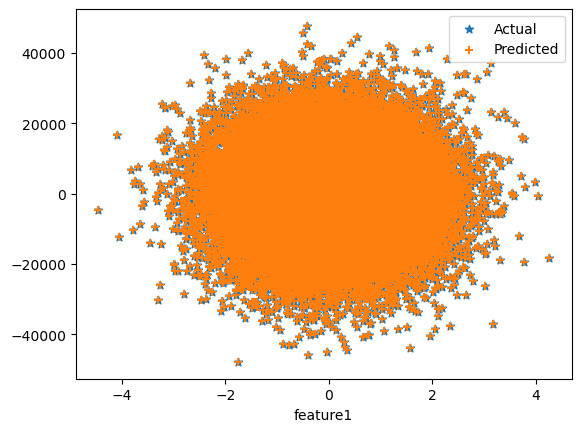

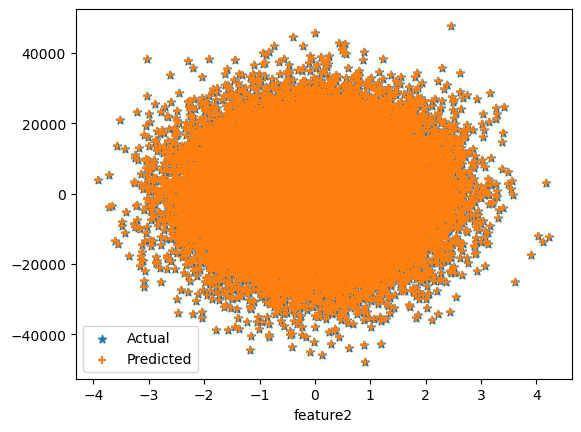

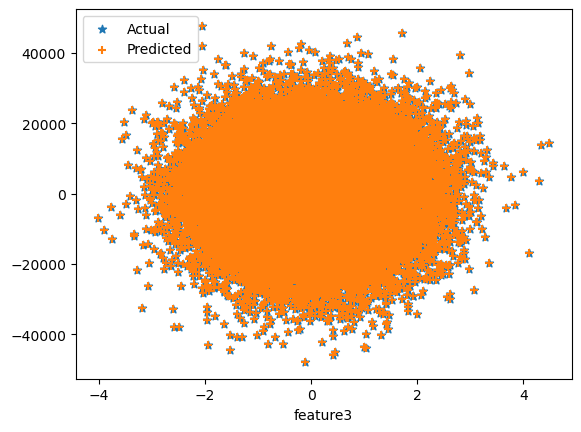

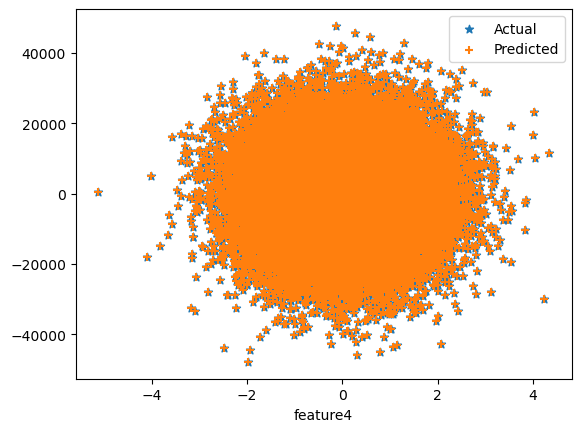

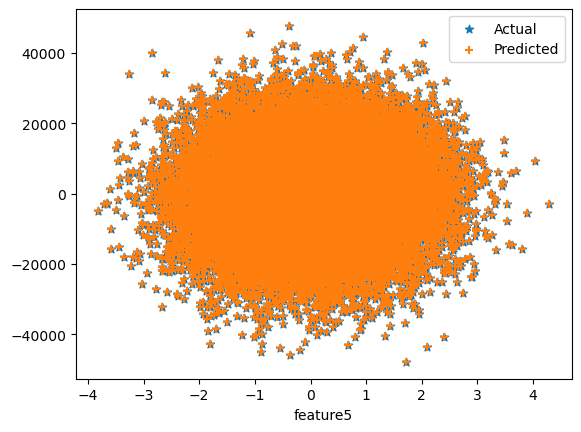

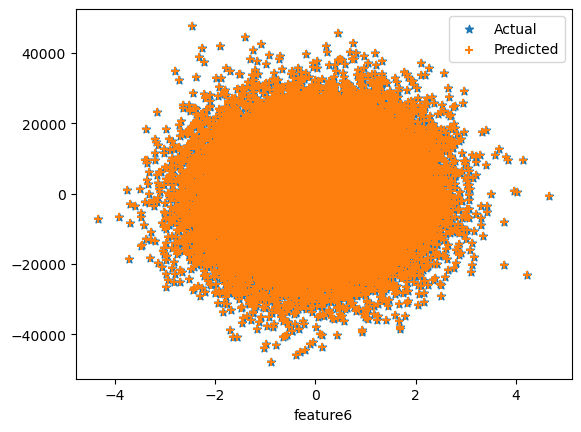

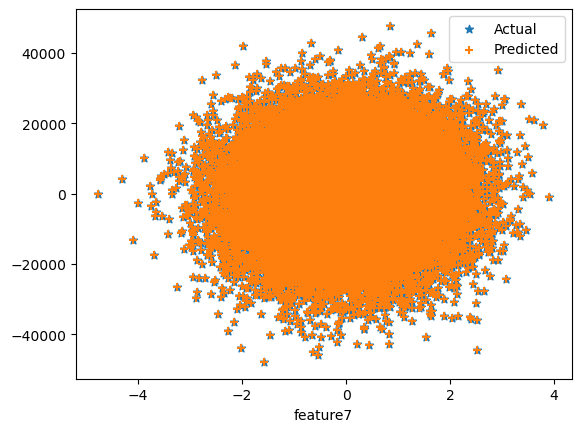

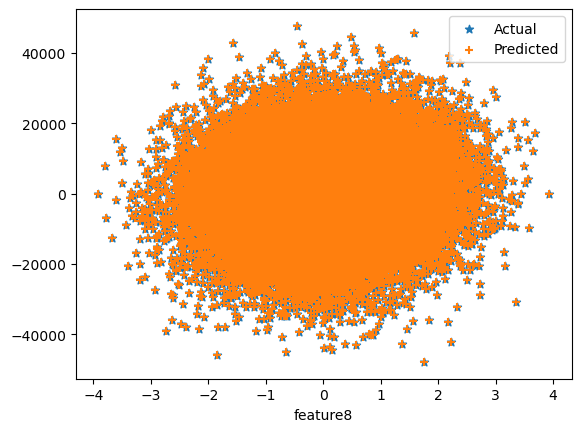

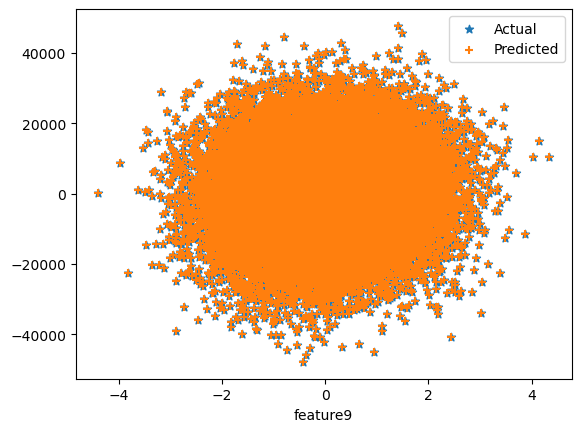

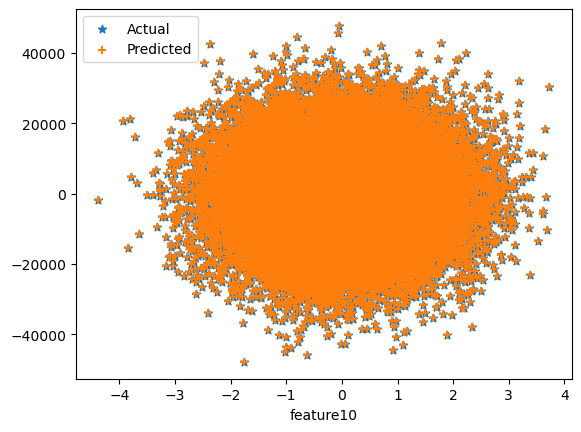

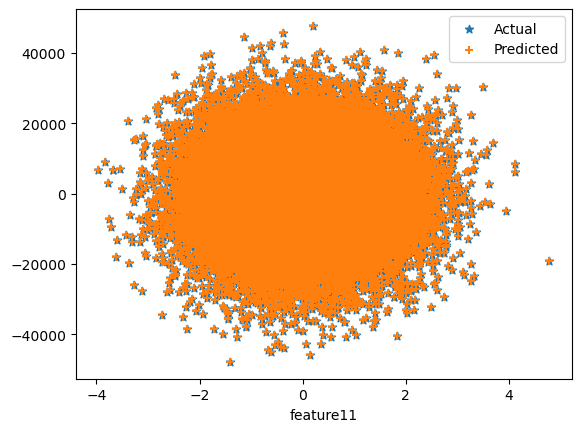

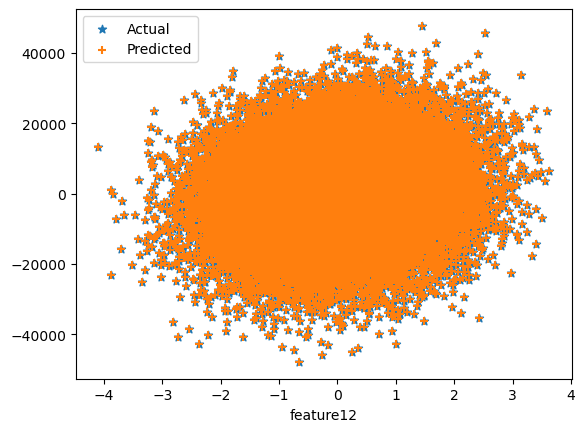

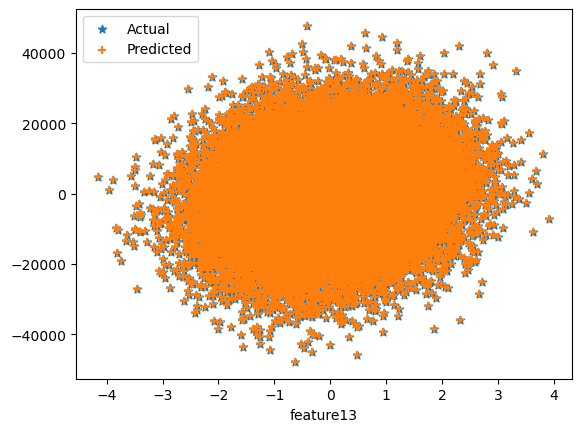

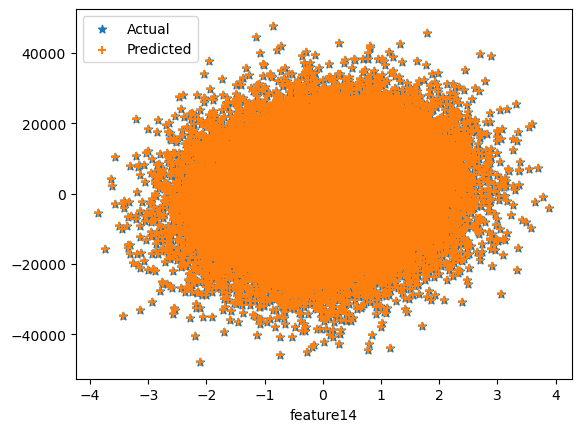

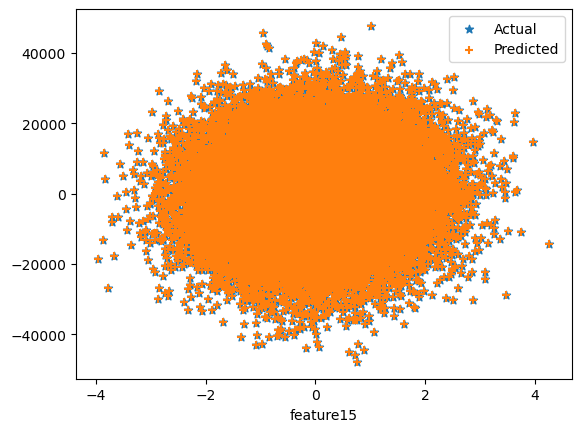

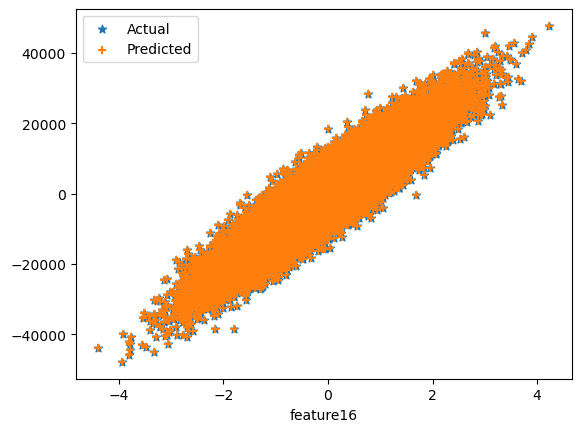

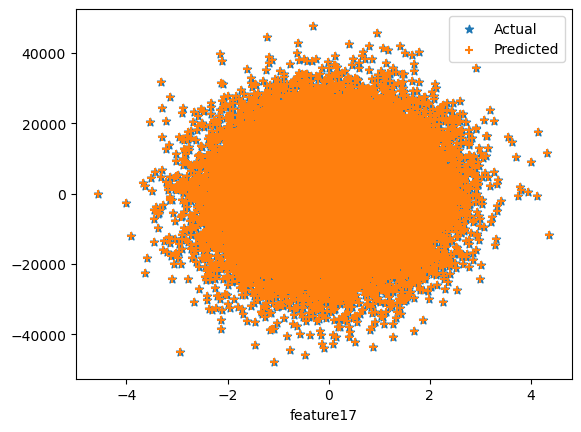

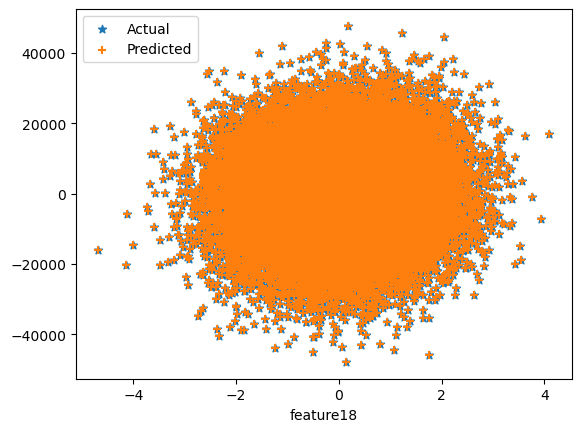

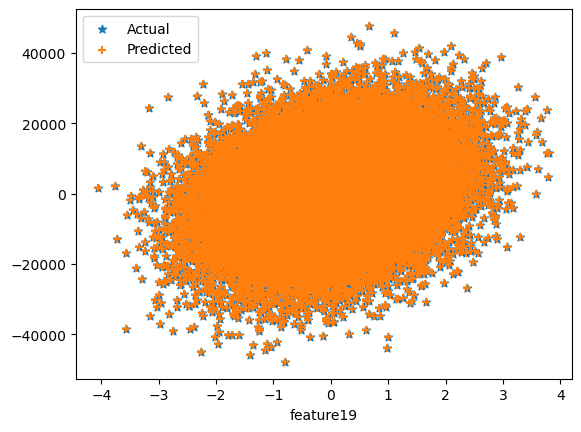

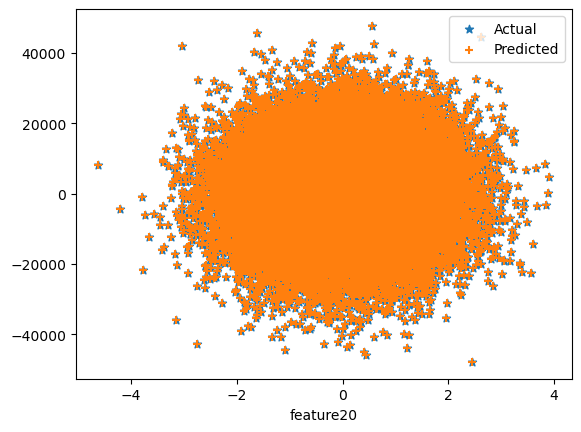

In [28]:
for i in range(x_train.shape[1]):
    plt.scatter(x_norm[:,i],y_train,label='Actual',marker='*')
    plt.scatter(x_norm[:,i],yp,label='Predicted',marker='+')
    plt.xlabel(f'feature{i+1}')
    plt.legend()
    plt.show()

# Load Test Data

In [15]:
td=pd.read_csv('Lineardata_test.csv')
td=np.array(td)
ID=td[:,0]
x_test=td[:,1:]
x_test_norm=(x_test-mu)/sigma

In [16]:
y_test_pred=predict(x_test_norm,w_final,b_final)

In [17]:
result=np.c_[ID,y_test_pred]
result=pd.DataFrame(result,columns=['ID','Y_predicted'])

In [18]:
result

,ID,Y_predicted
0,14189.0,-5420.003525
1,14742.0,17534.737682
2,13905.0,4663.854387
3,10072.0,2675.443476
4,14879.0,3383.701975
...,...,...
9995,19851.0,4198.088577
9996,11818.0,-16012.152911
9997,15552.0,9436.857032
9998,12161.0,-15189.057702


In [19]:
result.to_csv('Linear_pred.csv')